<a href="https://colab.research.google.com/github/ira89l/Home-tasks-/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%94_%D0%B7%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F_%E2%84%964_Pandas_%2B_SQL_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Завдання на використання Pandas + SQL

В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робили в попередній домашці:

In [25]:
!pip install mysql-connector-python
import mysql.connector
from mysql.connector.connection import MySQLConnection
import pandas as pd

con = mysql.connector.connect(user='user1',
                              password='7oygWy6P',
                              host='3.68.62.36',
                              database='employees')

cursor = con.cursor()

1. Виведіть кількість співробітників за роком, в який вони були найняті (hire_date) використовуючи pandas.read_sql. Запишіть результат в змінну df та виведіть значення змінної на екран.

In [26]:
import warnings

warnings.filterwarnings('ignore')

In [34]:
sql = """
SELECT YEAR(hire_date) AS hire_year, COUNT(*) AS employee_count
FROM employees
GROUP BY hire_year
ORDER BY hire_year;
"""

df = pd.read_sql(sql, con)

df

,hire_year,employee_count
0,1985,35316
1,1986,36150
2,1987,33501
3,1988,31436
4,1989,28394
5,1990,25610
6,1991,22568
7,1992,20402
8,1993,17772
9,1994,14835


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1JmyPlxFwRRxuCJ33VN-AqMDPSdV_DPXI)

2. Виведіть лінійний графік залежності кількості найманих співробітників від року найму. Ми ж не просто так дані з бази дістали :)
Перейменувати назви колонок датафрейму можна або методами pandas, або в sql запиті в попередньому завданні. Також, аби графік вийшов правильний, треба відсортувати роки за зростанням. І це також можна зробити аби в pandas, або в SQL.

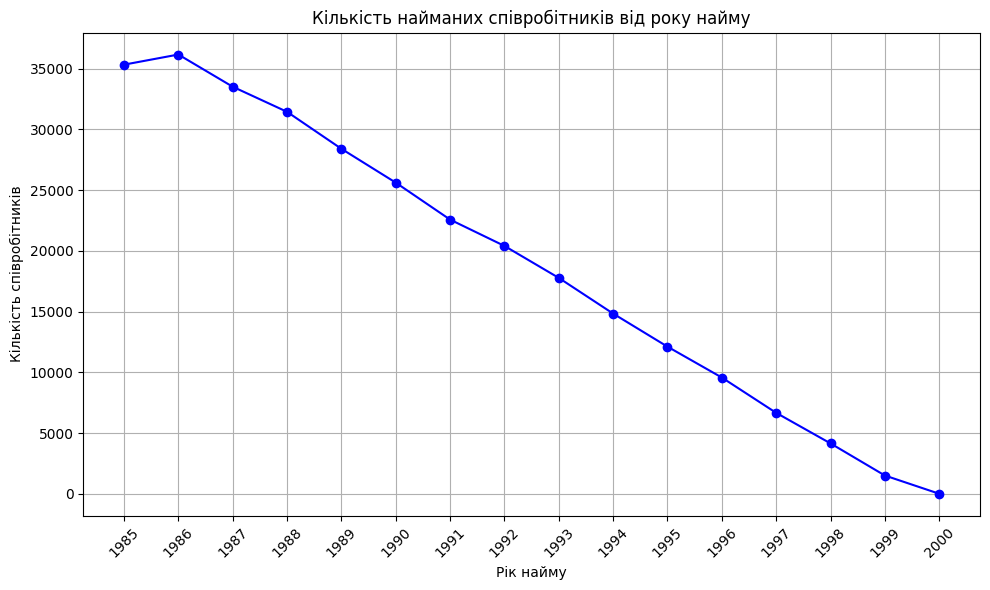

In [28]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(df['hire_year'], df['employee_count'], marker='o', linestyle='-', color='b')
plt.title('Кількість найманих співробітників від року найму')
plt.xlabel('Рік найму')
plt.ylabel('Кількість співробітників')
plt.xticks(df['hire_year'], rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1vXUpPNNvIL5dxsypr9sklvtq-H-NDwzU)

3. З допомогою SQL для робітників позиції `Engineer`, які вже не працюють в компанії (тобто у них є значення to_date, яке заповнено НЕ значенням за замовчанням) знайдіть кількість повних років перебування на позиції. Позиція зберігається в колонці `title` в таблиці `titles`. Кількість років перебування на позиції можна отримати наприклад з використанням функції `timestampdiff`. Ознайомтесь з її використанням в [документації](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_timestampdiff).

Результат запишіть в змінну `df_years` та виведіть цю змінну на екран.

In [30]:
sql = """
SELECT
    TIMESTAMPDIFF(YEAR, t.from_date, t.to_date) AS duration,
    t.from_date,
    t.to_date
FROM
    employees e
JOIN
    titles t ON e.emp_no = t.emp_no
WHERE
    t.title = 'Engineer'
    AND t.to_date IS NOT NULL
    AND t.to_date != '9999-01-01'
"""


df_years = pd.read_sql(sql, con)


df_years

,duration,from_date,to_date
0,9,1986-12-01,1995-12-01
1,5,1990-02-18,1995-02-18
2,8,1992-12-18,2000-12-18
3,8,1987-04-03,1995-04-03
4,5,1995-03-20,2001-03-19
...,...,...,...
84015,9,1989-11-23,1998-11-23
84016,5,1989-07-30,1994-07-30
84017,0,1993-02-22,1993-10-27
84018,6,1996-05-13,2002-05-13


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1nBqeBVYFuSQlMx9lNaDJJ_8hMx7yV9bX)

4. Використовуючи дані в  `df_years`, побудуйте гістограму кількості років, протягом яких люди з назвою позиції `Engineer` перебували на позиції. Не забудьте дати назву діаграмі, а також підписати вісі.

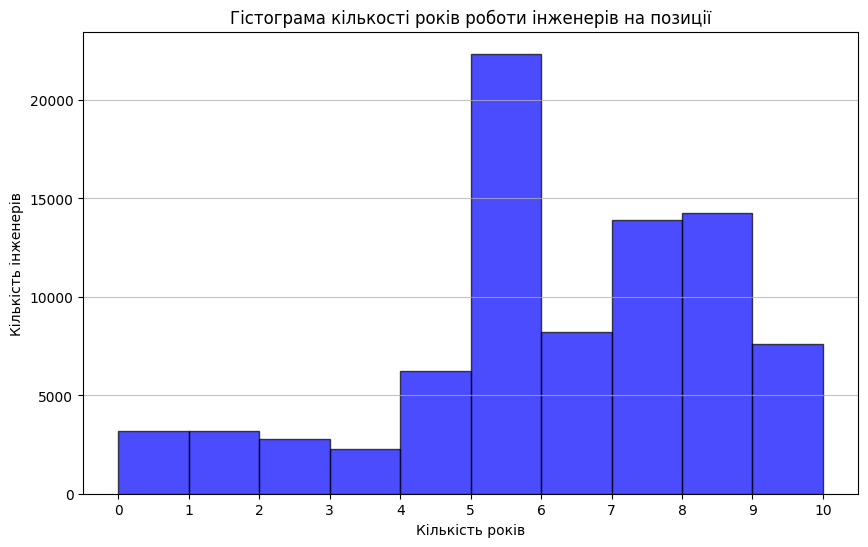

In [35]:
plt.figure(figsize=(10, 6))
plt.hist(df_years['duration'], bins=range(0, df_years['duration'].max() + 2), alpha=0.7, color='blue', edgecolor='black')
plt.title('Гістограма кількості років роботи інженерів на позиції')
plt.xlabel('Кількість років')
plt.ylabel('Кількість інженерів')
plt.grid(axis='y', alpha=0.75)
plt.xticks(range(0, df_years['duration'].max() + 2))
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1RKbfs5R9oniNs9XJcUpdlXFT-0BKXvPB)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [36]:
con.close()